# PCA, K-Means, Agglomerative Clustering, DBSCAN

## 1. import packages

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import mglearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## 2. Load Dataset

In [3]:
dataset1 = pd.read_csv('cancer.csv')

# Explore dataset
dataset1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,18.0,10.4,123.0,1000.0,0.1180,0.2780,0.3000,0.1470,0.242,0.0787,...,17.3,185.0,2020.0,0.162,0.666,0.712,0.265,0.460,0.1190,0.0
1,20.6,17.8,133.0,1330.0,0.0847,0.0786,0.0869,0.0702,0.181,0.0567,...,23.4,159.0,1960.0,0.124,0.187,0.242,0.186,0.275,0.0890,0.0
2,19.7,21.3,130.0,1200.0,0.1100,0.1600,0.1970,0.1280,0.207,0.0600,...,25.5,153.0,1710.0,0.144,0.424,0.450,0.243,0.361,0.0876,0.0
3,11.4,20.4,77.6,386.0,0.1420,0.2840,0.2410,0.1050,0.260,0.0974,...,26.5,98.9,568.0,0.210,0.866,0.687,0.258,0.664,0.1730,0.0
4,20.3,14.3,135.0,1300.0,0.1000,0.1330,0.1980,0.1040,0.181,0.0588,...,16.7,152.0,1580.0,0.137,0.205,0.400,0.163,0.236,0.0768,0.0


In [4]:
dataset2 = pd.read_csv('blob.csv', header=None)

# Explore dataset
dataset2.head()

,0,1,2
0,0.9210,-9.98,0.0
1,-5.2700,-9.62,0.0
2,-0.4530,-6.04,0.0
3,-0.0856,-2.17,1.0
4,1.5300,-0.36,1.0


In [5]:
print("The shape of data :", dataset1.shape)
print("The shape of data :", dataset2.shape)

The shape of data : (569, 31)
The shape of data : (100, 3)


## 3. Make Dataset

In [6]:
X1 = dataset1.iloc[:, 0:30]
Y1 = dataset1.iloc[:, 30]
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, stratify = Y1, random_state=0)

In [7]:
X2 = dataset2.iloc[:, 0:2]
Y2 = dataset2.iloc[:, 2]

## 4-1. PCA

In [8]:
# Data Scaling
scalar = MinMaxScaler().fit(x1_train)
x1_train_scaled = scalar.transform(x1_train)

In [9]:
pca = PCA(n_components=2).fit(x1_train_scaled)
x_pca = pca.transform(x1_train_scaled)

## 4-2. Analysis

In [10]:
print("Origin shape : ", x1_scaled.shape)  
print("After train : ", x1_pca.shape)  

NameError: name 'x1_scaled' is not defined

## 5-1. K-Means

In [12]:
kmeans_4 = KMeans(n_clusters=4).fit(X2)
print(kmeans_4.labels_)

kmeans_3 = KMeans(n_clusters=3).fit(X2)
print(kmeans_3.labels_)

kmeans_2 = KMeans(n_clusters=2).fit(X2)
print(kmeans_2.labels_)

[0 0 3 1 1 3 0 1 3 3 1 2 3 1 3 1 3 1 3 3 3 1 1 0 0 0 1 0 3 1 1 1 1 0 0 0 3
 1 0 1 1 0 3 1 3 0 1 1 0 1 0 1 2 1 0 2 3 1 0 1 1 2 3 1 2 0 0 1 1 0 2 2 1 2
 3 2 0 0 0 1 0 3 2 2 0 1 1 0 1 3 2 0 3 1 0 0 1 0 3 1]
[1 1 1 2 2 1 1 2 1 1 2 0 1 2 1 2 1 2 1 1 1 2 2 1 1 1 2 1 1 2 2 2 0 1 1 1 1
 2 1 2 0 1 1 2 2 1 2 2 1 2 1 2 0 2 1 0 1 2 1 2 2 0 1 2 0 1 1 2 2 1 0 0 0 0
 1 0 1 1 1 2 1 1 0 0 1 2 2 1 2 1 0 1 1 2 1 1 2 1 1 2]
[1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0]


## 5-2. Visualization

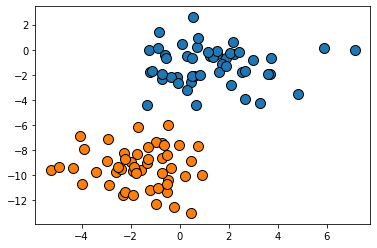

In [15]:
mglearn.discrete_scatter(x1 = X2[0], x2 = X2[1], y=kmeans_2.labels_, markers='o')
plt.show()

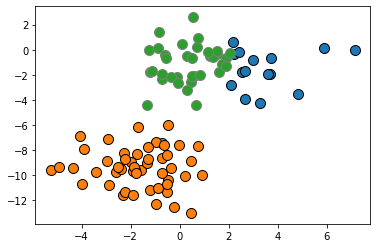

In [16]:
mglearn.discrete_scatter(x1 = X2[0], x2 = X2[1], y=kmeans_3.labels_, markers='o')
plt.show()

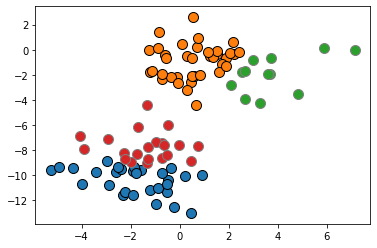

In [17]:
mglearn.discrete_scatter(x1 = X2[0], x2 = X2[1], y=kmeans_4.labels_, markers='o')
plt.show()

## 6-1. Agglomerative Clustering

In [18]:
agg_2 = AgglomerativeClustering(n_clusters=2).fit(X2)
print(agg_2.labels_)

agg_3 = AgglomerativeClustering(n_clusters=3).fit(X2)
print(agg_3.labels_)

agg_4 = AgglomerativeClustering(n_clusters=4).fit(X2)
print(agg_4.labels_)

[1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0]
[0 0 0 1 1 0 0 1 0 0 2 2 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 0 0 2 0 0 1 1 0 1 0 1 2 1 0 2 0 1 0 1 1 2 0 1 2 0 0 1 2 0 2 2 1 2
 0 2 0 0 0 1 0 0 2 2 0 1 1 0 1 0 2 0 0 1 0 0 1 0 0 2]
[3 0 0 1 1 0 3 1 0 0 2 2 0 1 0 1 0 1 0 0 0 1 1 3 3 0 1 0 0 1 1 1 1 3 0 0 0
 1 3 1 1 0 0 2 0 0 1 1 0 1 0 1 2 1 0 2 3 1 3 1 1 2 0 1 2 3 0 1 2 3 2 2 1 2
 0 2 0 0 0 1 3 0 2 2 3 1 1 3 1 0 2 0 0 1 0 0 1 0 0 2]


## 6-2. Visualization

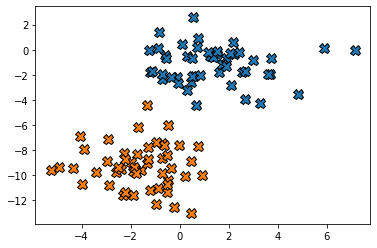

In [19]:
mglearn.discrete_scatter(x1 = X2.iloc[:,0], x2 = X2.iloc[:,1], y=agg_2.labels_, markers='X') 
plt.show()

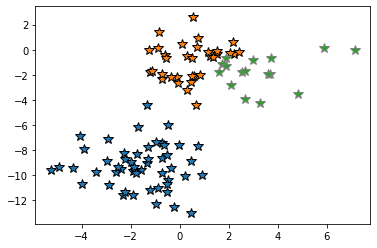

In [20]:
mglearn.discrete_scatter(x1 = X2.iloc[:,0], x2 = X2.iloc[:,1], y=agg_3.labels_, markers='*')
plt.show()

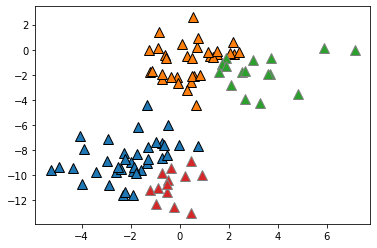

In [21]:
mglearn.discrete_scatter(x1 = X2.iloc[:,0], x2 = X2.iloc[:,1], y=agg_4.labels_, markers='^')
plt.show()

## 7-1. DBSCAN

In [22]:
dbscan_1 = DBSCAN(eps=0.5, min_samples=5).fit(X2)  # default
print(dbscan_1.labels_)
dbscan_2 = DBSCAN(eps=1, min_samples=5).fit(X2)
print(dbscan_2.labels_)
dbscan_3 = DBSCAN(eps=1.5, min_samples=5).fit(X2)
print(dbscan_3.labels_)
dbscan_4 = DBSCAN(eps=2, min_samples=5).fit(X2)
print(dbscan_4.labels_)

[-1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  0 -1  2 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1  0 -1  1 -1  0
 -1  2  1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  2  0 -1 -1 -1 -1 -1 -1  2 -1  1
 -1 -1 -1 -1]
[ 1 -1 -1  0  0  1  1  0  1  1  0  0  1  0 -1  0  1  0 -1  1  1  0  0  1
 -1  1  0 -1  1 -1  0  0  0  1 -1  1 -1 -1  1  0  0 -1  1  0 -1  1  0  0
 -1  0  1  0  0  0  1 -1  1  0  1  0  0 -1  1 -1 -1  1  1  0  0  1 -1  0
  0  0  1  0 -1  1  1  0 -1  1 -1 -1 -1  0  0  1  0  1 -1  1 -1  0  1  1
  0  1  1  0]
[ 0  0  0  1  1  0  0  1  0  0  1  1  0  1  0  1  0  1  0  0  0  1  1  0
  0  0  1  0  0  1  1  1  1  0  0  0 -1  1  0  1  1  0  0  1 -1  0  1  1
  0  1  0  1  1  1  0  1  0  1  0  1  1 -1  0 -1  1  0  0  1  1  0  1  1
  1  1  0  1  0  0  0  1 -1  0 -1 -1  0  1  1  0  1  0 -1  0  0  1  0  0
  1  0  0  1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0

## 7-2. Visualization

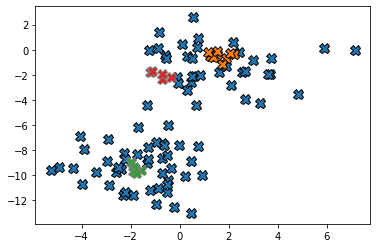

In [23]:
mglearn.discrete_scatter(x1 = X2.iloc[:,0], x2 = X2.iloc[:,1], y=dbscan_1.labels_, markers='X')
plt.show()

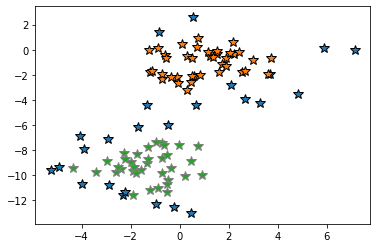

In [24]:
mglearn.discrete_scatter(x1 = X2.iloc[:,0], x2 = X2.iloc[:,1], y=dbscan_2.labels_, markers='*')
plt.show()

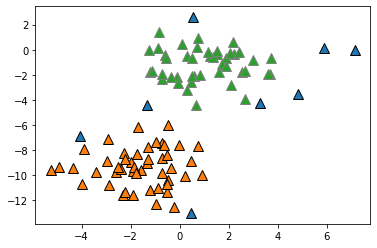

In [25]:
mglearn.discrete_scatter(x1 = X2.iloc[:,0], x2 = X2.iloc[:,1], y=dbscan_3.labels_, markers='^')
plt.show()

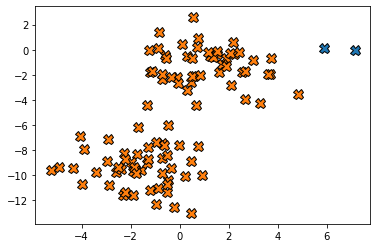

In [26]:
mglearn.discrete_scatter(x1 = X2.iloc[:,0], x2 = X2.iloc[:,1], y=dbscan_4.labels_, markers='X')
plt.show()

## 8. Adjusted_rand_score and Silhouette_score

In [27]:
kmeans = KMeans(n_clusters=2).fit(X2)
kmeans.labels_

agg = AgglomerativeClustering(n_clusters=2).fit(X2)
agg.labels_

dbscan = DBSCAN(eps=1.5).fit(X2)
dbscan.labels_

array([ 0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  0,
        1,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  1,  1,  1,  1,  0,
        0,  0, -1,  1,  0,  1,  1,  0,  0,  1, -1,  0,  1,  1,  0,  1,  0,
        1,  1,  1,  0,  1,  0,  1,  0,  1,  1, -1,  0, -1,  1,  0,  0,  1,
        1,  0,  1,  1,  1,  1,  0,  1,  0,  0,  0,  1, -1,  0, -1, -1,  0,
        1,  1,  0,  1,  0, -1,  0,  0,  1,  0,  0,  1,  0,  0,  1],
      dtype=int64)

In [28]:
print(adjusted_rand_score(Y2, kmeans.labels_))
print(adjusted_rand_score(Y2, agg.labels_))
print(adjusted_rand_score(Y2, dbscan.labels_))

1.0
0.9599960816486464
0.8494678155093766


In [29]:
print(silhouette_score(X2, kmeans.labels_))
print(silhouette_score(X2, agg.labels_))
print(silhouette_score(X2, dbscan.labels_))

0.6730254216755275
0.6694730690763173
0.5582539779706773
